In [5]:
import pandas as pd
import numpy as np
import os

In [6]:
raw_data_path = os.path.join(os.pardir, 'data', 'raw')
train_file_path = os.path.join(raw_data_path, "train.csv")
test_file_path = os.path.join(raw_data_path, "test.csv")

In [7]:
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')
type(train_df)

pandas.core.frame.DataFrame

In [220]:
test_df['Survived'] = -888 # Adding Survived with a default value

In [221]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-888
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-888
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-888
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-888
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-888


In [8]:
df = pd.concat((train_df, test_df))

/Users/howard.pinsley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [9]:
df.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


## Deal with missing values in the Embarded Column

In [11]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1.0,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1.0,113572


In [12]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Note that in the case of these two passengers, they are first class and paid 80.0.  Instead of mode, let's look at how the class and embarkation point might affect fare

In [13]:
df.groupby(['Pclass', 'Embarked']).Fare.median().unstack()

Embarked,C,Q,S
Pclass,,,
1,76.7292,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


In [14]:
df.Embarked.fillna('C', inplace=True)

## Fix one passenger with missing fare

In [15]:
df[df.Embarked.isnull()]


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [16]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,NaN,3701


In [17]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S')].Fare.median()
print(median_fare)

8.05


In [18]:
df.Fare.fillna(median_fare, inplace=True)

In [19]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 162.7+ KB


## Feature: Age

In [20]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1.0,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1.0,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0.0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1.0,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0.0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1.0,PC 17569
33,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,3,female,0,1.0,335677
37,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,3,male,0,1.0,2677


## Which feature or features can we use to fill in missing age

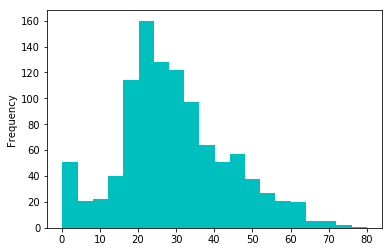

In [22]:
df.Age.plot(kind='hist', bins=20, color='c')

In [23]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

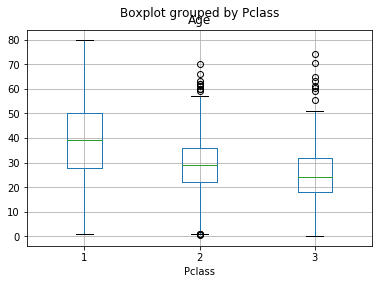

In [24]:
#age_sex_median = df.groupby('Sex').Age.transform('median')
df[df.Age.notnull()].boxplot('Age', 'Pclass')

In [25]:
df.Name.head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

### Try to create a new feature based on the person's "title" embedded in their name

In [26]:
def extractTitle(name):
    
    title_group = {
        'mr' :'Mr',
        'mrs' :'Mrs',
        'miss' :'Miss',
        'master' :'Master', 
        'don' :'Sir', 
        'rev' :'Sir', 
        'dr' :'Officer',
        'mme' :'Mrs',
        'ms':'Mrs',
        'major' :'Officer',
        'lady' :'Lady',
        'sir' :'Sir', 
        'mlle' :'Miss',
        'col' :'Officer', 
        'capt' :'Officer',
        'the countess':'Lady',
        'jonkheer' :'Sir',
        'dona':'Lady'
    }
    
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    return title_group[title.strip().lower()]


### Create a new feature called Title

In [27]:
df.Name.map(lambda n: extractTitle(n)).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Sir', 'Officer', 'Lady'],
      dtype=object)

In [28]:
df['Title'] = df.Name.map(lambda t: extractTitle(t))

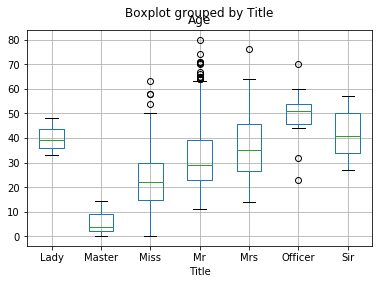

In [29]:
# This looks better
df[df.Age.notnull()].boxplot('Age', 'Title')

In [30]:
title_median_age = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_median_age, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 132.9+ KB


# Now deal with outliers

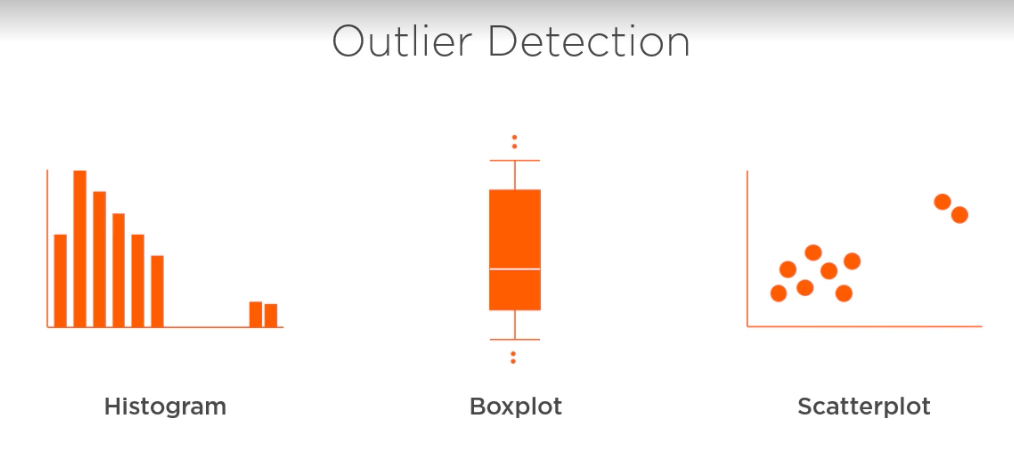

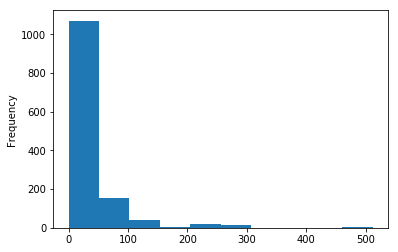

In [32]:
# Look for outliers in passenger fare
df.Fare.plot(kind='hist')

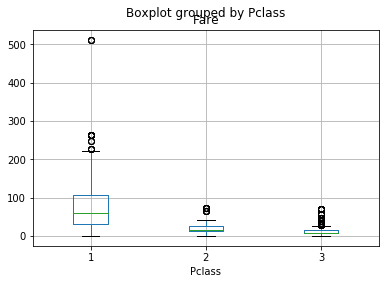

In [40]:
df.boxplot('Fare', 'Pclass')

In [46]:
df.loc[df.Fare > 500]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1.0,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1.0,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1.0,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,NaN,PC 17755,Mrs


In [44]:
# Note above the common ticket number...
df.loc[df.Fare > 500, ['Age']]

,Age
PassengerId,
259,35.0
680,36.0
738,35.0
1235,58.0


In [48]:
# You could create a new feature called LogFare
LogFare = np.log(df.Fare+1)

In [58]:
# You could use quantile cut to create do 'binning'
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
6         (7.896, 14.454]
7       (31.275, 512.329]
8        (14.454, 31.275]
9         (7.896, 14.454]
10       (14.454, 31.275]
11       (14.454, 31.275]
12       (14.454, 31.275]
13        (7.896, 14.454]
14       (14.454, 31.275]
15        (-0.001, 7.896]
16       (14.454, 31.275]
17       (14.454, 31.275]
18        (7.896, 14.454]
19       (14.454, 31.275]
20        (-0.001, 7.896]
21       (14.454, 31.275]
22        (7.896, 14.454]
23        (7.896, 14.454]
24      (31.275, 512.329]
25       (14.454, 31.275]
26      (31.275, 512.329]
27        (-0.001, 7.896]
28      (31.275, 512.329]
29        (-0.001, 7.896]
30        (-0.001, 7.896]
              ...        
1280      (-0.001, 7.896]
1281     (14.454, 31.275]
1282    (31.275, 512.329]
1283    (31.275, 512.329]
1284     (14.454, 31.275]
1285      (7.896, 14.454]
1286     (14.454, 31.275]


In [60]:
# You can assign labels to bins to transform a numerical feature to a category feature (this is one technique in the general family
# of discretization techniques)
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
6             low
7       very_high
8            high
9             low
10           high
11           high
12           high
13            low
14           high
15       very_low
16           high
17           high
18            low
19           high
20       very_low
21           high
22            low
23            low
24      very_high
25           high
26      very_high
27       very_low
28      very_high
29       very_low
30       very_low
          ...    
1280     very_low
1281         high
1282    very_high
1283    very_high
1284         high
1285          low
1286         high
1287    very_high
1288     very_low
1289    very_high
1290     very_low
1291     very_low
1292    very_high
1293         high
1294    very_high
1295    very_high
1296         high
1297          low
1298          low
1299    very_high
1300     very_low
1301          low
1302     very_low
1303    very_hig

In [61]:
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']).value_counts()

very_low     337
high         328
very_high    323
low          321
Name: Fare, dtype: int64

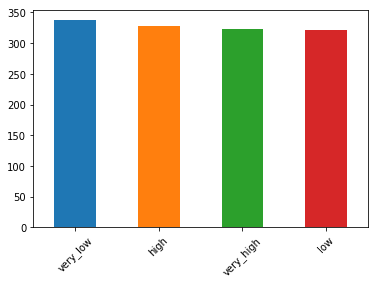

In [64]:
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']).value_counts().plot(kind='bar', rot=45);

In [65]:
# Create new feature using binning technique above for passenger fare (this is part of feature engineering)
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])

In [66]:
df

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,Mr,very_low
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,Mrs,very_high
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,Miss,low
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,Mrs,very_high
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,Mr,low
6,29.0,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877,Mr,low
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463,Mr,very_high
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,349909,Master,high
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,347742,Mrs,low


# Feature Engineering

## Age State: (Adult or Child)

In [69]:
np.where(df.Age >= 18, 'Adult', 'Child')

array(['Adult', 'Adult', 'Adult', ..., 'Adult', 'Adult', 'Child'],
      dtype='<U5')

In [71]:
df.head(1)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.25,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,Mr,very_low


In [75]:
df['AgeState'] = np.where(df.Age >= 18, 'Adult', 'Child')

In [80]:
type(df.AgeState)

numpy.ndarray

In [81]:
type(df['AgeState'])

pandas.core.series.Series

In [87]:
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [90]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0.0,495,54
1.0,279,63


## Feature: FamilySize

In [91]:
df['FamilySize'] = df.Parch + df.SibSp + 1 # parents + siblings + 1 for self

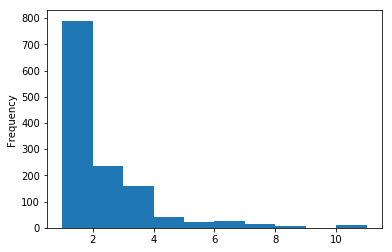

In [98]:
df.FamilySize.plot(kind='hist', bins=10)

In [104]:
df.loc[df.FamilySize == max(df.FamilySize), ['Name', 'Survived', 'FamilySize', 'Ticket']]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0.0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0.0,11,CA. 2343
202,"Sage, Mr. Frederick",0.0,11,CA. 2343
325,"Sage, Mr. George John Jr",0.0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0.0,11,CA. 2343
847,"Sage, Mr. Douglas Bullen",0.0,11,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",0.0,11,CA. 2343
1080,"Sage, Miss. Ada",NaN,11,CA. 2343
1234,"Sage, Mr. John George",NaN,11,CA. 2343


In [108]:
pd.crosstab(df[df.Survived != -888].FamilySize, df[df.Survived != -888].Survived).T

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0.0,374,72,43,8,12,19,8,6,7
1.0,163,89,59,21,3,3,4,0,0


### IsMother
(mothers would have been given lifeboat priority)

In [109]:
df['IsMother'] = np.where((df.Sex == 'female') & (df.Parch > 0) & (df.Age >= 18) & (df.Title != 'Miss'), 1, 0)

In [112]:
df[df.IsMother == 1].head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,347742,Mrs,low,Adult,3,1
26,38.0,NaN,S,31.3875,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",5,3,female,1,1.0,347077,Mrs,very_high,Adult,7,1
99,34.0,NaN,S,23.0000,"Doling, Mrs. John T (Ada Julia Bone)",1,2,female,0,1.0,231919,Mrs,high,Adult,2,1
141,35.0,NaN,C,15.2458,"Boulos, Mrs. Joseph (Sultana)",2,3,female,0,0.0,2678,Mrs,high,Adult,3,1
167,35.0,E33,S,55.0000,"Chibnall, Mrs. (Edith Martha Bowerman)",1,1,female,0,1.0,113505,Mrs,very_high,Adult,2,1


In [115]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0.0,533,16
1.0,302,40


### Deck

In [116]:
pd.Cabin

AttributeError: module 'pandas' has no attribute 'Cabin'

In [119]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [122]:
df[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0.0,113784,Mr,very_high,Adult,1,0


In [125]:
# Assume this is a mistake and set it to unknown
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [148]:
def get_deck(cabin):
    return str(cabin)[0].upper() if pd.notnull(cabin) else 'Z'

df['Deck'] = df.Cabin.map(lambda c: get_deck(c))

In [151]:
pd.crosstab(df.loc[df.Survived != -888, 'Survived'], df.loc[df.Survived != -888, 'Deck'])

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0.0,8,12,24,8,8,5,2,482
1.0,7,35,35,25,24,8,2,206


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      891 non-null float64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int64
Deck          1309 non-null object
dtypes: category(1), float64(3), int64(5), object(8)
memory usage: 175.3+ KB


## Categorical Feature Encoding

### The non-numeric categorical data needs to be numeric for many ML algorithms

Binary Encoding (two classes only -- e.g. Gender) -- is_male (0 or 1)

If you have more than two...

Label Encoding - Good for labels that are have an intrinsic order... e.g. Use integers for each level (Low = 1, Medium = 2, High = 3)

One-Hot Encoding - No intrinsic order (like embarkment point).  You can create a feature for each value and set it to 0 or 1 (e.g. is_A, is_B, is_C, etc.)


In [159]:
df['IsMale'] = np.where(df['Sex'] == 'male', 1, 0)

In [163]:
df.loc[0:5,['Sex', 'IsMale']]

,Sex,IsMale
PassengerId,,
1,male,1
2,female,0
3,female,0
4,female,0
5,male,1


In [171]:
df[0:5][['Sex','IsMale']]

,Sex,IsMale
PassengerId,,
1,male,1
2,female,0
3,female,0
4,female,0
5,male,1


## Use the get_dummies pd command (and assign the result back) to create one-hot encoding for our non-ordered categorical features.  Note that we could have done binary encoding for AgeState as there were only two.  The result will be the same.

In [176]:
df = pd.get_dummies(df, columns = ['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState'])

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              891 non-null float64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int64
IsMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcl

In [178]:
df.head(5)

,Age,Cabin,Fare,Name,Parch,Sex,SibSp,Survived,Ticket,FamilySize,...,Title_Sir,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,male,1,0.0,A/5 21171,2,...,0,1,0,0,0,0,0,1,1,0
2,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,female,1,1.0,PC 17599,2,...,0,0,0,0,1,1,0,0,1,0
3,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,female,0,1.0,STON/O2. 3101282,1,...,0,0,1,0,0,0,0,1,1,0
4,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,female,1,1.0,113803,2,...,0,0,0,0,1,0,0,1,1,0
5,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,male,0,0.0,373450,1,...,0,0,1,0,0,0,0,1,1,0


## Drop and reorder features
### Drop the columns that won't be used and move the predict column to the front

In [182]:
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis = 1, inplace = True)

In [183]:
df.head()

,Age,Fare,Survived,FamilySize,IsMother,IsMale,Deck_A,Deck_B,Deck_C,Deck_D,...,Title_Sir,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,7.2500,0.0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,38.0,71.2833,1.0,2,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
3,26.0,7.9250,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,35.0,53.1000,1.0,2,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
5,35.0,8.0500,0.0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [184]:
df.columns

Index(['Age', 'Fare', 'Survived', 'FamilySize', 'IsMother', 'IsMale', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Z',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Lady', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Sir',
       'Fare_Bin_very_low', 'Fare_Bin_low', 'Fare_Bin_high',
       'Fare_Bin_very_high', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'AgeState_Adult', 'AgeState_Child'],
      dtype='object')

In [187]:
columns = ['Survived'] + [column for column in df.columns if column != 'Survived']

In [189]:
df = df[columns]

In [193]:
df[df.Survived == -888]

,Survived,Age,Fare,FamilySize,IsMother,IsMale,Deck_A,Deck_B,Deck_C,Deck_D,...,Title_Sir,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,


In [195]:
df.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [196]:
df.count()

Survived               891
Age                   1309
Fare                  1309
FamilySize            1309
IsMother              1309
IsMale                1309
Deck_A                1309
Deck_B                1309
Deck_C                1309
Deck_D                1309
Deck_E                1309
Deck_F                1309
Deck_G                1309
Deck_Z                1309
Pclass_1              1309
Pclass_2              1309
Pclass_3              1309
Title_Lady            1309
Title_Master          1309
Title_Miss            1309
Title_Mr              1309
Title_Mrs             1309
Title_Officer         1309
Title_Sir             1309
Fare_Bin_very_low     1309
Fare_Bin_low          1309
Fare_Bin_high         1309
Fare_Bin_very_high    1309
Embarked_C            1309
Embarked_Q            1309
Embarked_S            1309
AgeState_Adult        1309
AgeState_Child        1309
dtype: int64

# Write the file

In [206]:
df.loc[pd.isnull(df.Survived), 'Survived'] = -888

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Survived              1309 non-null float64
Age                   1309 non-null float64
Fare                  1309 non-null float64
FamilySize            1309 non-null int64
IsMother              1309 non-null int64
IsMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title

In [208]:
df

,Survived,Age,Fare,FamilySize,IsMother,IsMale,Deck_A,Deck_B,Deck_C,Deck_D,...,Title_Sir,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,22.0,7.2500,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,1.0,38.0,71.2833,2,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
3,1.0,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,1.0,35.0,53.1000,2,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
5,0.0,35.0,8.0500,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
6,0.0,29.0,8.4583,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
7,0.0,54.0,51.8625,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
8,0.0,2.0,21.0750,5,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
9,1.0,27.0,11.1333,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [211]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
write_train_path = os.path.join(processed_data_path, "train.csv")
write_test_path = os.path.join(processed_data_path, "test.csv")

In [212]:
df.loc[df.Survived != -888].to_csv(write_train_path)

In [214]:
columns = [column for column in df.columns if column != 'Survived']
columns

['Age',
 'Fare',
 'FamilySize',
 'IsMother',
 'IsMale',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_Z',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Title_Lady',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Officer',
 'Title_Sir',
 'Fare_Bin_very_low',
 'Fare_Bin_low',
 'Fare_Bin_high',
 'Fare_Bin_very_high',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'AgeState_Adult',
 'AgeState_Child']

In [218]:
df.loc[df.Survived == -888, columns].to_csv(write_test_path)

# Advanced Visualizations with MatPlotLib

In [227]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 80.,  62., 324., 426., 189., 108.,  66.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

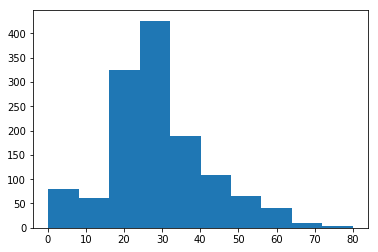

In [229]:
plt.hist(df.Age)

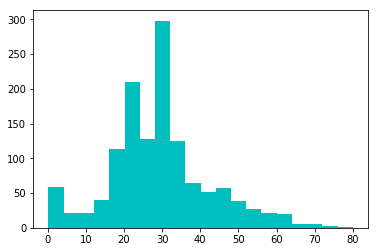

In [231]:
plt.hist(df.Age, bins=20, color='c')
plt.show()

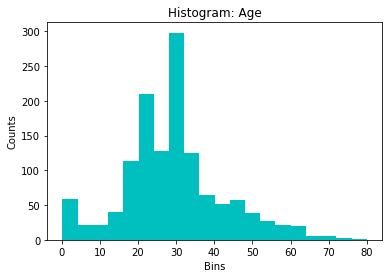

In [232]:
plt.hist(df.Age, bins=20, color='c')
plt.title("Histogram: Age")
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.show()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11dd2c3c8>)

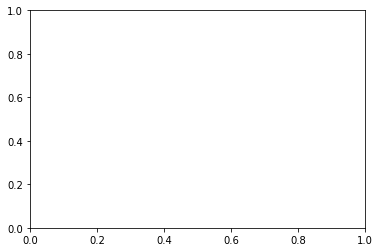

In [234]:
plt.subplots()

# Create two side by side charts by extracting the figure and axes objects

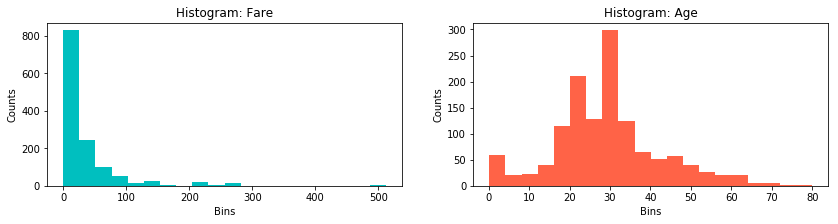

In [235]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,3))

ax1.hist(df.Fare, bins=20, color = 'c')
ax1.set_title("Histogram: Fare")
ax1.set_xlabel("Bins")
ax1.set_ylabel("Counts")

ax2.hist(df.Age, bins=20, color = 'tomato')
ax2.set_title("Histogram: Age")
ax2.set_xlabel("Bins")
ax2.set_ylabel("Counts")

plt.show()


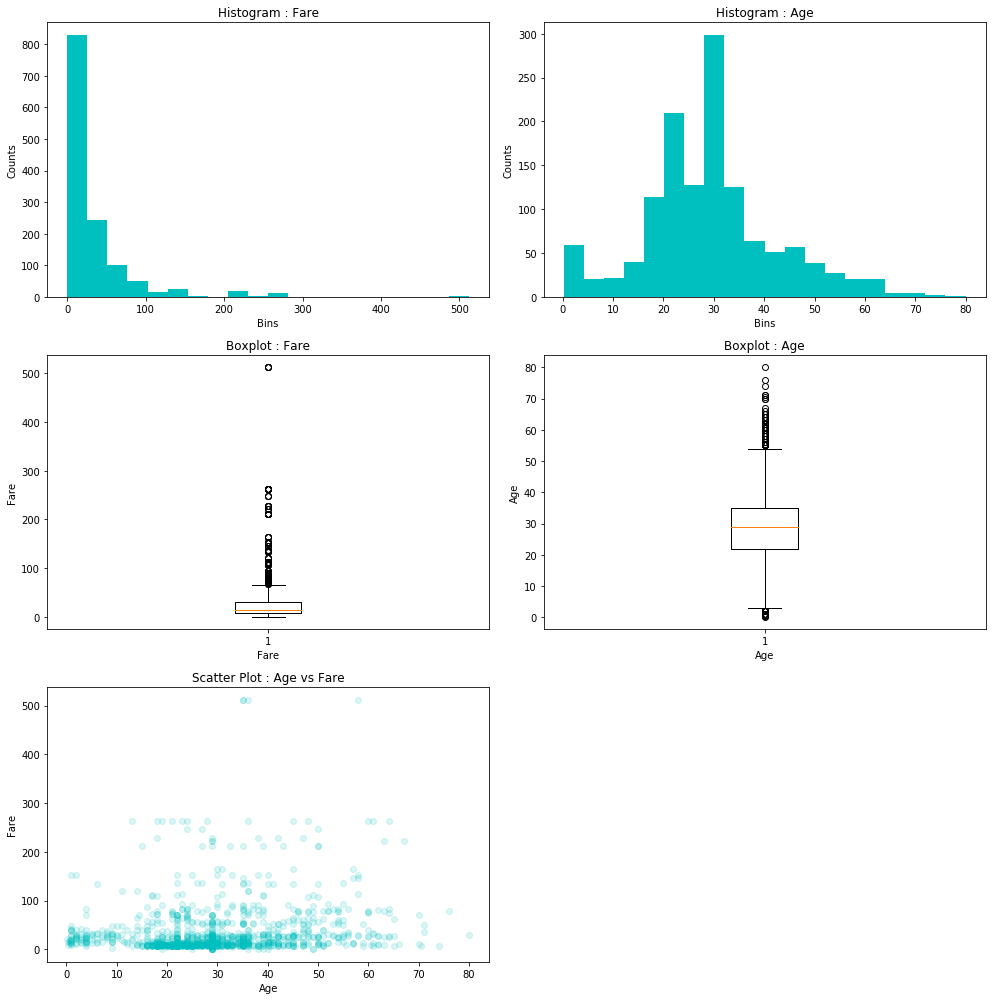

In [241]:
# Adding subplots
f , ax_arr = plt.subplots(3 , 2 , figsize=(14,14))

# Plot 1
ax_arr[0,0].hist(df.Fare, bins=20, color='c')
ax_arr[0,0].set_title('Histogram : Fare')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

# Plot 2
ax_arr[0,1].hist(df.Age, bins=20, color='c')
ax_arr[0,1].set_title('Histogram : Age')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

# Plot 3
ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('Boxplot : Fare')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

# Plot 4
ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title('Boxplot : Age')
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')

# Plot 5
ax_arr[2,0].scatter(df.Age, df.Fare, color='c', alpha=0.15)
ax_arr[2,0].set_title('Scatter Plot : Age vs Fare')
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

ax_arr[2,1].axis('off')
plt.tight_layout()

plt.show()